In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from utils import PkdbModel, codeine_idx, pktype_data, filter_out, convert_unit, unstring
plt.style.use('seaborn-white')
import numpy as np
plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })

import pint
ureg = pint.UnitRegistry()


ModuleNotFoundError: No module named 'pint'

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
all_complete = PkdbModel("all_complete", destination="2-merged")
all_complete.read()

/home/janek/.virtualenvs/pkdb_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (24,25,26,37,77,85,98,99,101,107,111,117,118,122,128,129,130,145,152,153,157,162,163,164,180,181,182,185,186,192,196,200,204,208,213,220,224,228,229,231,232,233,234,235,239,243,252) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
all_complete.data["CYP"] = all_complete.data[('CYP2D6 phenotype', 'choice')]
all_complete.data["CYP_G"] = all_complete.data[('CYP2D6 genotype', 'choice')]


In [4]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance_name"] == "morphine")
substance_intervention_index = (all_complete.data["substance_name_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)
my_data["pharmacokinetics"] = my_data["pharmacokinetics"].apply(eval).apply(lambda x: [e.get("pk") for e in x])

/home/janek/.virtualenvs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/janek/.virtualenvs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
colors = sns.color_palette("colorblind",n_colors=8)
#header_color = sns.color_palette("dark",n_colors=1)[0]
blues = sns.color_palette("Blues")
my_data["color"] = colors[:3]

/home/janek/.virtualenvs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
frames = []
for i, df in my_data[["time","mean","sd","se","cv","CYP_G","unit","pk","color", "pktype"]].iterrows():
    print(df["time"])
    
    new_df = pd.concat([df]*len(df["time"]), axis=1).T.reset_index()
    new_df["time"] = df["time"]
    new_df["mean"] = df["mean"]
    new_df["sd"] = df["sd"]
    new_df["se"] = df["se"]
    new_df["cv"] = df["cv"]
    
    frames.append(new_df)
df_all = pd.concat(frames)
df_all = convert_unit(df_all, "gram / liter", unit_out = "ng/µl", factor=ureg("gram / liter").to("ng/µl").m , data_fields=["mean","sd","se"])

[ 0.    0.25  0.5   1.    2.    3.    4.    6.    8.   10.   12.   24.  ]
[ 0.    0.25  0.5   1.    2.    3.    4.    6.    8.   10.   12.   24.  ]
[ 0.    0.25  0.5   1.    2.    3.    4.    6.    8.   10.   12.   24.  ]


NameError: name 'ureg' is not defined

In [7]:
df_all

,index,time,mean,sd,se,cv,CYP_G,unit,pk,color,pktype
0,9156,0.00,0.000000,NaN,NaN,NaN,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
1,9156,0.25,0.001330,0.001150,0.000365,0.869,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
2,9156,0.50,0.001640,0.000702,0.000222,0.427,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
3,9156,1.00,0.001550,0.000683,0.000216,0.440,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
4,9156,2.00,0.000856,0.000412,0.000130,0.482,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
5,9156,3.00,0.000598,0.000238,0.000075,0.398,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
6,9156,4.00,0.000437,0.000180,0.000057,0.413,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
7,9156,6.00,0.000250,0.000103,0.000033,0.413,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
8,9156,8.00,0.000178,0.000097,0.000030,0.542,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
9,9156,10.00,0.000133,0.000084,0.000027,0.632,*1/*1,gram / liter,2352,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration


In [8]:
from scipy import stats
def _regression(t, c):
    """ Linear regression on the log timecourse after maximal value.
    No check is performed if already in equilibrium distribution !.
    The linear regression is calculated from all data points after the maximum.

    :return:
    """
    # TODO: check for distribution and elimination part of curve.
    max_index = np.argmax(c)
    
    # linear regression
    x = t[-4:]
    y = np.log(c[-4:])
    if max_index == (len(c) - 1):
        return [np.nan] * 6
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return [slope, intercept, r_value, p_value, std_err, max_index]


In [9]:
[slope, intercept, r_value, p_value, std_err, max_index] = _regression(x,y)

plt.plot(x,y)
plt.plot(x[3:],np.exp(intercept + slope * x[3:]), "--")
#plt.yscale("log")


NameError: name 'x' is not defined

In [10]:
my_func()

NameError: name 'my_func' is not defined

In [11]:
#x = df_CYP["time"][3:]
#y = np.log(df_CYP["mean"][3:])
[slope, intercept, r_value, p_value, std_err] = stats.linregress(x, y)
[slope, intercept, r_value, p_value, std_err]

NameError: name 'x' is not defined

In [12]:
plt.plot(x,y)
plt.plot(x,intercept+slope*x)

NameError: name 'x' is not defined

In [13]:
df_CYP["mean"][3]

NameError: name 'df_CYP' is not defined

In [14]:
 [np.exp(slope), np.exp(intercept), r_value, p_value, std_err, max_index]

NameError: name 'slope' is not defined

/home/janek/.virtualenvs/pkdb_analysis/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


NameError: name 'ureg' is not defined

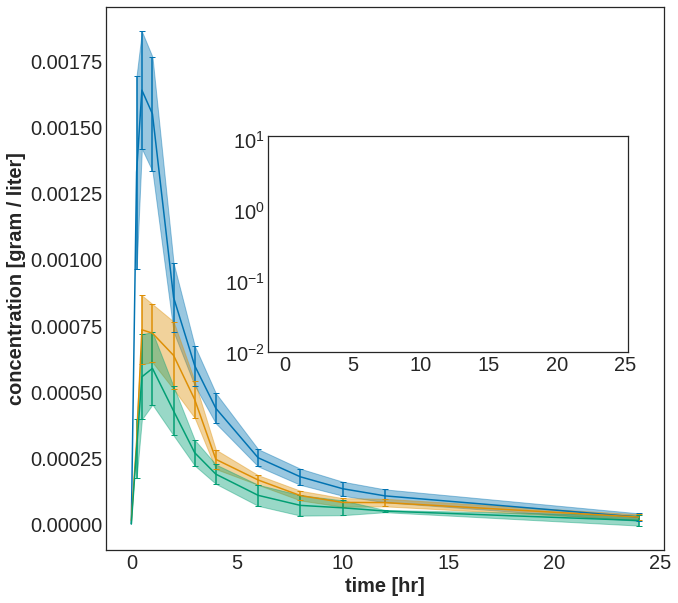

In [15]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

left, bottom, width, height = [0.35, 0.4, 0.5, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
axes = (ax1, ax2)
#ax2.xaxis.set_visible(False)
#ax2.yaxis.set_visible(False)                  
ax2.set_yscale("log")
ax2.set_ylim(bottom=0.01)                 

               
    
for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    
    #label = CYP_G
    #for i, output in output_pks.iterrows():
    #    label += f"\n {output['pktype']:>10}: {output['mean']:<15} {'['+output['unit']+']':>10}"
    
    #print(label)
    if CYP_G == "*1/*1":
        x = df_CYP["time"]
        y = df_CYP["mean"]
    for ax in axes:
        ax.errorbar(df_CYP["time"], df_CYP["mean"],label=CYP_G,color=df_CYP['color'].unique()[0],yerr=df_CYP["se"], capsize=3)#, label=label)#,yerr=df_CYP["sd"])
        [slope, intercept, r_value, p_value, std_err, max_index] = _regression(df_CYP["time"],df_CYP["mean"])
       

    ax2.plot(df_CYP["time"],np.exp(intercept) * np.exp(slope * df_CYP["time"]), "--", color=df_CYP['color'].unique()[0])#, label="fit")

    
        
    ax1.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray",color = df_CYP['color'].unique()[0])
   
    
  

    
    
    
ax1.set_xlabel("time [hr]")
ax1.set_ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")
           
frames  = []
               
index_raw = (all_complete.data["calculated"] == False)

for CYP_G, df_CYP in df_all.groupby("CYP_G"):    
    output_pks = all_complete.data[all_complete.data["timecourse_pk"] == df_CYP["pk"].unique()[0]]
    frames.append(output_pks)
               
                   
    study = output_pks["study"].unique()[0]
    index_study = (all_complete.data["study"] == study)
    intervention = output_pks["raw_pk_intervention"].unique()[0]
    index_intervention = (all_complete.data["raw_pk_intervention"] == intervention)
    substance = output_pks["substance_name"].unique()[0]
    index_substance = (all_complete.data["substance_name"] == substance)
    index_outputs= (all_complete.data["output_type"]== "outputs") 
    index_cyp = (all_complete.data["CYP_G"]== CYP_G)

            
    raw_outputs = all_complete.data[index_raw & index_study & index_intervention & index_substance & index_outputs & index_cyp]
    frames.append(raw_outputs)

           
outputs = pd.concat(frames)
               
outputs[["mean","sd","se","median"]]=outputs[["mean","sd","se","median"]].applymap(pd.to_numeric)

auc_unit = "µg/l*hr"
clearance_unit = "l/hr"
cmax_unit = "ng/µl"
kel_unit = "1/hr"
hlf_unit = "hr"
vd_unit = "l"

convert_unit(df=outputs,unit_in ="gram * hour / liter", unit_out=auc_unit,factor=ureg("gram * hour / liter").to(auc_unit).m ,data_fields=["mean","sd","se","median"])
convert_unit(outputs,unit_in ="gram / liter",  unit_out=cmax_unit, factor=ureg("gram / liter").to(cmax_unit).m,data_fields=["mean","sd","se","median"])
               
               
convert_unit(outputs,unit_in ="hour",  unit_out=hlf_unit, factor=ureg("hour").to(hlf_unit).m ,data_fields=["mean","sd","se","median"])
convert_unit(outputs,unit_in ="liter / hour",  unit_out=kel_unit, factor=ureg("liter / hour").to(clearance_unit).m  ,data_fields=["mean","sd","se","median"])
convert_unit(outputs,unit_in ="liter",  unit_out=vd_unit, factor = ureg("liter").to(vd_unit).m ,data_fields=["mean","sd","se","median"])
               
               
convert_unit(outputs,unit_in ="1 / minute",  unit_out=hlf_unit, factor=ureg("1 / minute").to(kel_unit).m ,data_fields=["mean","sd","se","median"])
               


outputs_n = outputs.pivot_table(values="mean",index=["CYP_G"],columns=["pktype","calculated"])
#outputs_n =outputs_n[["auc_end","clearance","cmax","kel","thalf","vd"]].round(2)

outputs_n.rename(columns={"auc_end":f"AUC END [{auc_unit}]",
                          "clearance":f"CLEARANCE [{clearance_unit}]",
                          "cmax":f"CMAX [{cmax_unit}]",
                          "kel":f"KEL [{kel_unit}]",
                          "vd":f"VD [{vd_unit}]",
                          "thalf":f"THALF [{hlf_unit}]",



                         }, inplace=True)
outputs_n.sort_index(inplace = True)
           
"""

"""
ax1.legend()
plt.savefig("codeine.png")

plt.show()



In [ ]:
outputs[8015]

In [ ]:
ureg("gram * hour / liter").to("ng*hr/ml")

In [ ]:
pd.concat(frames_raw)[["mean","sd","pktype","CYP_G","unit"]]

In [16]:
output_pks.columns.to_list()

AttributeError: 'Index' object has no attribute 'to_list'

In [17]:
font = font_manager.FontProperties(family='Roboto Mono',
                                   weight='normal',
                                   style='normal', size=16,) 

for key, cell in table.get_celld().items():
    row, col = key
    
    cell.set_text_props(fontproperties=FontProperties(fname="Roboto"))

NameError: name 'font_manager' is not defined

In [ ]:
#outputs

In [ ]:
outputs_n = outputs.reset_index().pivot_table(columns="calculated",index=["CYP_G","pktype","unit"],values = ["mean","sd"])

In [ ]:
outputs_n["Difference"] = abs(outputs_n[("mean", True)] - outputs_n[("mean", False)]).round(2)
outputs_n["Difference %"] = abs(100*((outputs_n[("mean", True)] - outputs_n[("mean", False)]) / outputs_n[("mean", False)])).round(2)

mean_ind = ('mean', False)
sd_ind = ('sd', False)

outputs_n["Raw"] = outputs_n.apply(lambda x: f"{x[mean_ind]:.2f} +- {x[sd_ind]:.2f}", axis=1)
outputs_n["Calculated"] = outputs_n[('mean', True)]
                                          

In [18]:
outputs_n[["Raw","Calculated","Difference", "Difference %"]].round(2).to_csv("codeine.csv")

NameError: name 'outputs_n' is not defined

In [267]:

ureg("ng/ml").to("mg/L")*5

0.005 <Unit('milligram / liter')>

In [15]:
cell text = []
for 

SyntaxError: invalid syntax (<ipython-input-15-0be45b13a2e1>, line 1)

In [ ]:
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')